In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import dates

In [44]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')
raw.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                Close                  High              \
                AAPL        SPY      AAPL         SPY      AAPL         SPY   
Date                                                                          
2010-01-04  6.505280  88.117889  7.643214  113.330002  7.660714  113.389999   
2010-01-05  6.516528  88.351135  7.656429  113.629997  7.699643  113.680000   
2010-01-06  6.412871  88.413376  7.534643  113.709999  7.686786  113.989998   
2010-01-07  6.401019  88.786575  7.520714  114.190002  7.571429  114.330002   
2010-01-08  6.443573  89.082039  7.570714  114.570000  7.571429  114.620003   

                 Low                  Open                 Volume             
                AAPL         SPY      AAPL         SPY       AAPL        SPY  
Date                                                                          
2010-01-04  7.585000  111.510002  7.622500  112.370003  493729600  118944600  
2010-01-05  7.616071  112.849998  7.664286  113.260002  601904800  111579900  
2010-01-06  7.526786  113.430000  7.656429  113.519997  552160000  116074400  
2010-01-07  7.466071  113.180000  7.562500  113.500000  477131200  131091100  
2010-01-08  7.466429  113.660004  7.510714  113.889999  447610800  126402800

In [3]:
raw.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2010-01-04 to 2019-12-30
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2515 non-null   float64
 1   (Adj Close, SPY)   2515 non-null   float64
 2   (Close, AAPL)      2515 non-null   float64
 3   (Close, SPY)       2515 non-null   float64
 4   (High, AAPL)       2515 non-null   float64
 5   (High, SPY)        2515 non-null   float64
 6   (Low, AAPL)        2515 non-null   float64
 7   (Low, SPY)         2515 non-null   float64
 8   (Open, AAPL)       2515 non-null   float64
 9   (Open, SPY)        2515 non-null   float64
 10  (Volume, AAPL)     2515 non-null   int64  
 11  (Volume, SPY)      2515 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 255.4 KB


In [6]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

In [61]:
raw.pipe?

In [45]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
.iloc[:,::2]
.pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.516528,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.412871,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.401019,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.443573,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.451073,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.517082,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200


<AxesSubplot:xlabel='Date'>

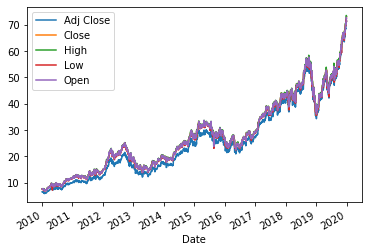

In [14]:
(raw
 .iloc[:,:-2:2]
 .pipe(fix_cols)
 .plot()
)

<AxesSubplot:xlabel='Date'>

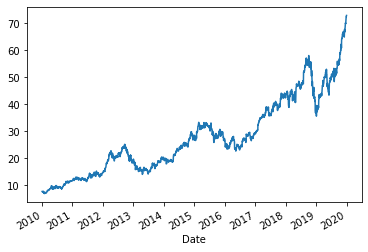

In [16]:
(raw
.iloc[:,::2]
.pipe(fix_cols)
.Close
.plot()
) 

<AxesSubplot:xlabel='Date'>

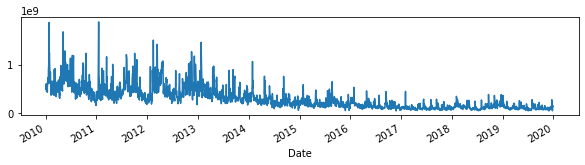

In [18]:
(raw
.iloc[:,::2]
.pipe(fix_cols)
.Volume
.plot(figsize=(10,2))
)

<AxesSubplot:xlabel='Date'>

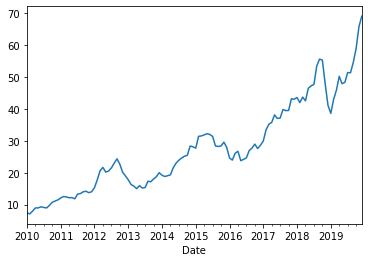

In [22]:
(raw
.iloc[:,::2]
.pipe(fix_cols)
.resample('M')
.Close
.mean()
.plot() 
)

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
def plot_candle(df,ax):
    #wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    #red - decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    #green - increase
    green =df.query("Open <= Close")
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DateLocator())
    return df

(raw
.iloc[:,::2]
.pipe(fix_cols)
.resample('d')
.agg({'Open':'first',"High":'max','Low':'min','Close':'last'})
.loc['jan 2018':'jun 2018']
.pipe(plot_candle,ax)
)
    

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


<Figure size 720x360 with 1 Axes>

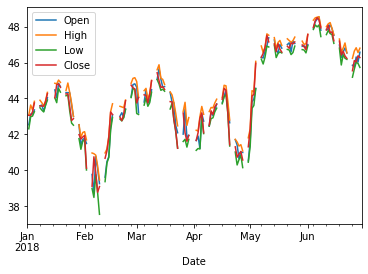

In [47]:
(raw
.iloc[:,::2]
.pipe(fix_cols)
.resample('d')
.agg({'Open':'first',"High":'max','Low':'min','Close':'last'})
.loc['jan 2018':'jun 2018']
.pipe(plot_candle,ax)
.plot() 
);
   

# Challenge
Plot the Candles for the time period of Sep 2019 to Dec 2019  

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
(raw
.iloc[:,::2]
.pipe(fix_cols)
.resample('d')
.agg({'Open':'first',"High":'max','Low':'min','Close':'last'})
.loc['sep 2019':'dec 2019']
.pipe(plot_candle,ax)
)

,Open,High,Low,Close
Date,,,,
2019-09-01,NaN,NaN,NaN,NaN
2019-09-02,NaN,NaN,NaN,NaN
2019-09-03,51.607498,51.744999,51.055000,51.424999
2019-09-04,52.097500,52.369999,51.830002,52.297501
2019-09-05,53.000000,53.492500,52.877499,53.320000
...,...,...,...,...
2019-12-26,71.205002,72.495003,71.175003,72.477501
2019-12-27,72.779999,73.492500,72.029999,72.449997
2019-12-28,NaN,NaN,NaN,NaN


<Figure size 720x360 with 1 Axes>

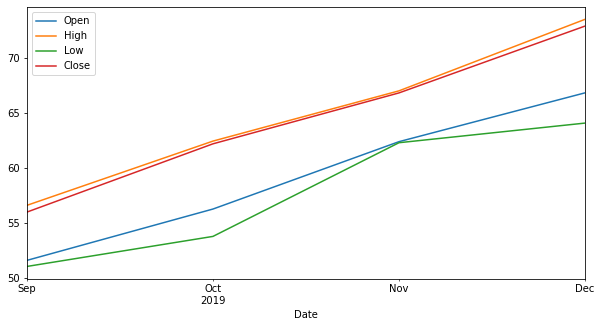

In [60]:
(raw
.iloc[:,::2]
.pipe(fix_cols)
.resample('M')
.agg({'Open':'first',"High":'max','Low':'min','Close':'last'})
.loc['sep 2019':'dec 2019']
.pipe(plot_candle,ax)
.plot(figsize=(10,5))
);

In [ ]:
#Returns

In [62]:
aapl = (raw
        .iloc[:,::2]
        .pipe(fix_cols)
       )

aapl
        

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.516528,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.412871,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.401019,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.443573,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.451073,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.517082,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200


In [63]:
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015907,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001848,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-23,0.016319,0.016318,0.005661,0.006498,-0.006023,-0.642827
2019-12-24,0.000950,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864


<AxesSubplot:xlabel='Date'>

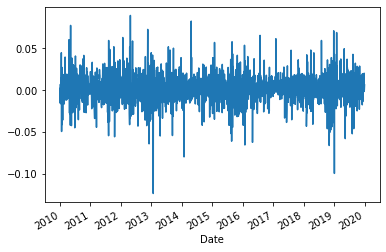

In [66]:
# Plot returns
(aapl
 .pct_change()
 .Close
 .plot()
)

<AxesSubplot:>

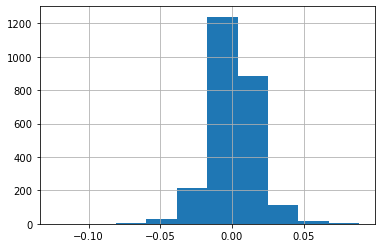

In [67]:
# Histogram of Returns
(aapl
.pct_change()
.Close
.hist()
)

<AxesSubplot:>

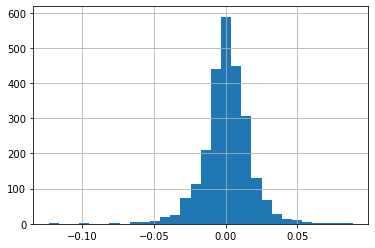

In [68]:
#Change bins
(aapl
.pct_change()
.Close
.hist(bins=30)
)

<AxesSubplot:xlabel='Date'>

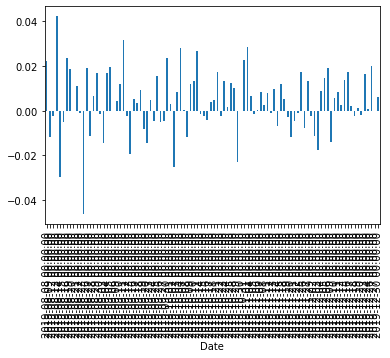

In [71]:
# Bar plot Returns
(aapl
.pct_change()
.Close
.iloc[-100:]
.plot.bar()
)

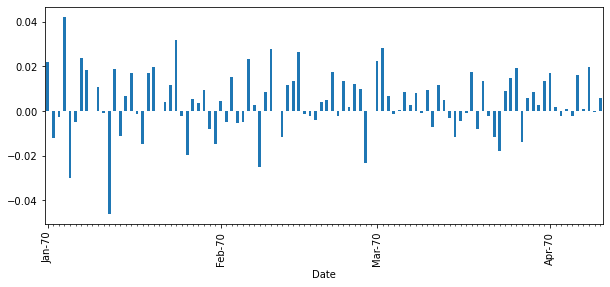

In [72]:
fig, ax = plt.subplots(figsize=(10,4))
(aapl
.pct_change()
.Close
.iloc[-100:]
.plot.bar(ax=ax)
)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())

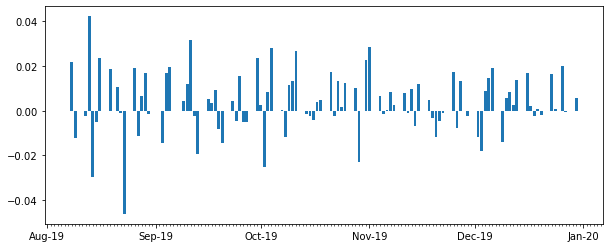

In [74]:
def my_bar(ser,ax):
    ax.bar(ser.index,ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10,4))
_ = (aapl
.pct_change()
.Close
.iloc[-100:]
.pipe(my_bar,ax)
)

In [ ]:
# Cumulative Returns
# Cumulative returns is the amount that investment has gained or lost over time:
# (current price - original price)/original price

<AxesSubplot:xlabel='Date'>

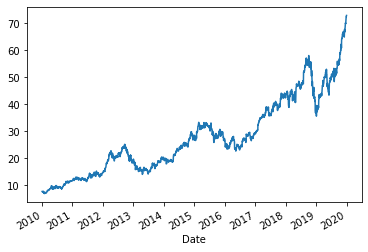

In [75]:
(aapl
.Close
.plot()
)

<AxesSubplot:xlabel='Date'>

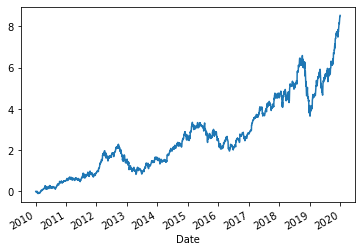

In [76]:
(aapl
.Close
.sub(aapl.Close[0])
.div(aapl.Close[0])
.plot()
)

<AxesSubplot:xlabel='Date'>

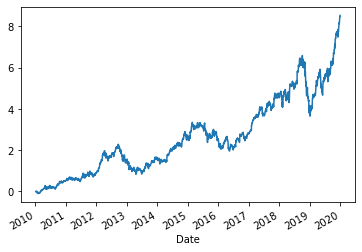

In [77]:
# alternate calculation
(aapl
.Close
.pct_change()
.add(1)
.cumprod()
.sub(1)
.plot()
)

<AxesSubplot:xlabel='Date'>

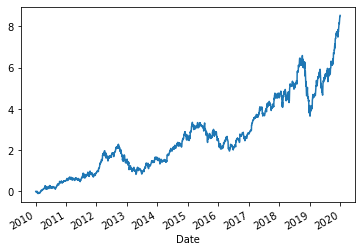

In [78]:
# create a function for calculating
def calc_cum_returns(df,col):
    ser = df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
           )

(aapl
.pipe(calc_cum_returns,'Close')
.plot()
)

In [79]:
# lambda is an 'anonymous function'
def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [80]:
(lambda df: get_returns(df))(aapl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [83]:
# Create a new column
(aapl
.assign(cum_returns=lambda df:calc_cum_returns(df,'Close'))
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,,
2010-01-04,6.505280,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05,6.516528,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06,6.412871,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07,6.401019,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08,6.443573,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-23,69.451073,71.000000,71.062500,70.092499,70.132500,98572000,8.289286
2019-12-24,69.517082,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26,70.896332,72.477501,72.495003,71.175003,71.205002,93121200,8.482594


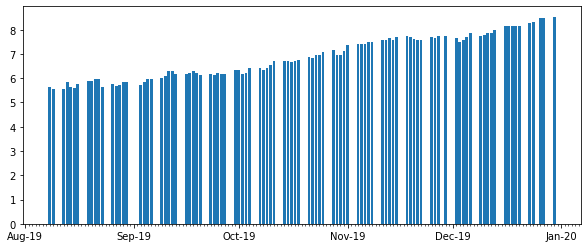

In [84]:
def my_bar(ser,ax):
    ax.bar(ser.index,ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10,4))
_ = (aapl
.pipe(calc_cum_returns, "Close")
.iloc[-100:]
.pipe(my_bar,ax)
)

In [ ]:
#Volatility

In [85]:
(aapl
.Close
.mean()
)

27.568102107796943

In [86]:
(aapl
.Close
.std()
)

14.016253049378737

In [88]:
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.pct_change_close
.std()
)

0.01623613318144792

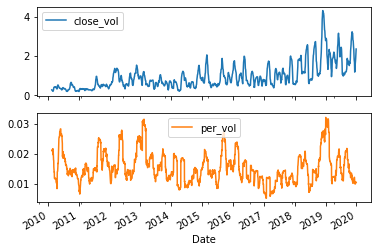

In [93]:
(aapl
.assign(close_vol=aapl.rolling(30).Close.std(),
        per_vol=aapl.Close.pct_change().rolling(30).std())
.iloc[:,-2:]
.plot(subplots=True)
);

In [94]:
# 15 days volatility
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.resample('15D')
.std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,0.078267,0.091958,0.072060,0.101749,0.080372,7.028347e+07,0.010383
2010-01-19,0.227369,0.267141,0.253188,0.232856,0.234097,4.361002e+08,0.030046
2010-02-03,0.113359,0.133188,0.102614,0.124059,0.123349,1.455474e+08,0.017088
2010-02-18,0.137291,0.161306,0.138608,0.166270,0.157960,9.844200e+07,0.011254
2010-03-05,0.074477,0.087505,0.088090,0.113449,0.129484,1.951401e+08,0.014002
...,...,...,...,...,...,...,...
2019-10-29,1.748351,1.725581,1.449098,2.018594,1.418779,2.960150e+07,0.013412
2019-11-13,0.516257,0.527773,0.404718,0.436709,0.509585,1.787058e+07,0.009868
2019-11-28,0.977060,0.998849,1.019784,0.918851,0.936544,2.826525e+07,0.012526


In [96]:
# 15 days rolling volatility
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.rolling(window=15,min_periods=15)
.std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_change_close
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-23,1.847549,1.888754,1.932242,1.953716,1.906586,4.891036e+07,0.010997
2019-12-24,1.736153,1.774875,1.762143,1.842910,1.836871,5.206250e+07,0.009136
2019-12-26,1.757919,1.797126,1.757091,1.821097,1.758186,5.084715e+07,0.009786


<AxesSubplot:xlabel='Date'>

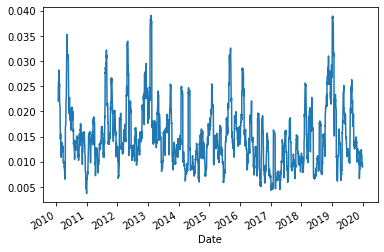

In [97]:
# 15 days volatility
#if column name conflicts with methods needs to use index access ([])
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.rolling(window=15,min_periods=15)
.std()
['pct_change_close']
.plot()
)

In [ ]:
# Challenge
# Plot the rolling volatility over 30-day sliding windows for 2015-2019

<AxesSubplot:xlabel='Date'>

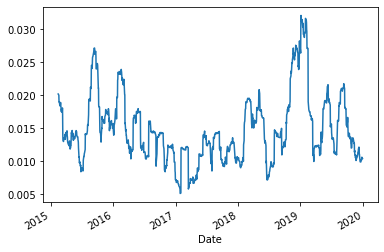

In [100]:
(aapl
.assign(pct_change_close=aapl.Close.pct_change())
.loc['2015':'2019']
.rolling(window=30,min_periods=30)
.std()
 ['pct_change_close']
.plot()
)

In [ ]:
## Rolling 